**Feature Extraction for CEBSDB Heart Rate Data**

1. **Load and Concatenate CSV Files**:  
   Reads RR interval data from multiple CSV files in the CEBSDB dataset, combining them into a single DataFrame.

2. **Data Visualization**:  
   Generates histograms to visualize the distribution of RR interval data across all records.

3. **Outlier Removal**:  
   Uses interquartile range (IQR) to define upper and lower bounds and removes RR interval values outside these bounds, creating a cleaned dataset.

4. **Calculate Heart Rate Variability Metrics**:  
   For each patient, the script calculates:
   - Heart Rate (BPM)
   - Mean RR Interval
   - Range of RR Intervals
   - Interquartile Range (IQR)
   - Variance and Standard Deviation
   - Coefficient of Variation (CV)

5. **Save Processed Data**:  
   Appends calculated metrics, patient demographics (age, gender), and file information, then saves the aggregated data to a CSV file.

6. **Histogram Visualization of Key Features**:  
   Visualizes the distribution of selected features (e.g., variance) in the final saved dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Load the CSV file into a pandas DataFrame
filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/CEBSDB/'

In [4]:
# Create empty arrays to store the results
bpm_arr = []
mean_arr = []
range_arr = []
iqr_arr = []
var_arr = []
std_arr = []
cv_arr = []
gender_arr = []
age_arr = []
classification = []
name = []

In [5]:
patient_gender = [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1]
patient_age = [30, 28, 25, 23, 22, 23, 30, 19, 24, 26, 22, 20, 27, 26, 26, 22, 22, 21, 26, 26]

In [10]:
df_list = []
for i in range(1, 10):
  filename = (filepath + "cebsdb_b00" + "%d" + "_rr_interval.csv") %i
  df = pd.read_csv(filename)
  #df['anno'] = filename
  df_list.append(df)
for i in range(10, 21):
  filename = (filepath + "cebsdb_b0" + "%d" + "_rr_interval.csv") %i
  df = pd.read_csv(filename)
  df_list.append(df)

full_df = pd.concat(df_list)


In [11]:
full_df.shape

(6823, 1)

array([[<Axes: title={'center': 'R-R Interval (Samples)'}>]], dtype=object)

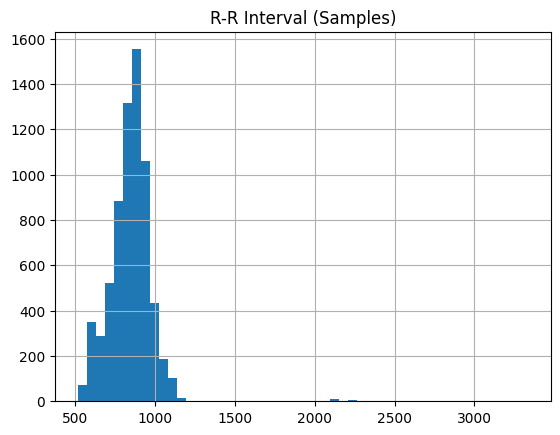

In [12]:
full_df.hist(bins=50)

In [13]:
# Calculate the interquartile range (IQR)
full_q1 = np.percentile(full_df, 25)
full_q3 = np.percentile(full_df, 75)
full_iqr_rr = full_q3 - full_q1

# Calculate the lower and upper bounds for outliers
full_lower_bound = full_q1 - 1.5 * full_iqr_rr
full_upper_bound = full_q3 + 1.5 * full_iqr_rr

# Remove outliers from the data
full_df_clean = full_df[(full_df >= full_lower_bound) & (full_df <= full_upper_bound)]
full_df_clean = pd.DataFrame(full_df_clean)

In [14]:
full_df_clean.shape

(6823, 1)

array([[<Axes: title={'center': 'R-R Interval (Samples)'}>]], dtype=object)

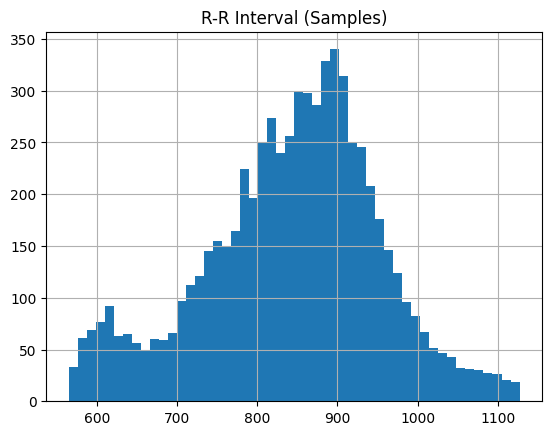

In [15]:
full_df_clean.hist(bins=50)

In [17]:
import os
import pandas as pd
import numpy as np

i = 0
for filename in os.listdir(filepath):
    file_path = os.path.join(filepath, filename)

    # Only process if it's a file and has a .csv extension
    if os.path.isfile(file_path) and filename.endswith('.csv'):
        df = pd.read_csv(file_path)

        # Remove outliers from the data
        df_clean = df[(df['R-R Interval (Samples)'] >= full_lower_bound) & (df['R-R Interval (Samples)'] <= full_upper_bound)]
        data_clean = df_clean['R-R Interval (Samples)']

        peaks = len(data_clean)
        # Average heart rate
        bpm = peaks / 5
        # Calculate the mean HRV
        mean_rr = np.mean(data_clean)
        # Calculate the range
        range_rr = np.rint(np.max(data_clean) - np.min(data_clean))
        # Calculate the interquartile range (IQR)
        q1 = np.percentile(data_clean, 25)
        q3 = np.percentile(data_clean, 75)
        iqr_rr = q3 - q1
        # Calculate the variance
        var_rr = np.var(data_clean)
        # Calculate the standard deviation
        std_rr = np.std(data_clean)
        # Calculate the coefficient of variation
        cv_rr = std_rr / mean_rr * 100

        # Append metrics to lists
        bpm_arr.append(bpm)
        mean_arr.append(mean_rr)
        range_arr.append(range_rr)
        iqr_arr.append(iqr_rr)
        var_arr.append(var_rr)
        std_arr.append(std_rr)
        cv_arr.append(cv_rr)
        gender_arr.append(patient_gender[i])
        age_arr.append(patient_age[i])
        classification.append(0)
        name.append(filename)
        i += 1


In [18]:
# set the path to the directory containing the files
new_filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/CEBSDB/cebsdb_matrix_1.csv'
# Write the data to the CSV file
combined = list(zip(age_arr, gender_arr, bpm_arr, mean_arr, range_arr, iqr_arr, var_arr, std_arr, cv_arr, classification, name))
with open(new_filepath, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Gender', 'BPM', 'Mean', 'Range', 'IQR', 'Variance', 'Std Dev', 'Coeff of Var', 'Classification', 'File'])
    for row in combined:
        writer.writerow(row)

23967.760409183047


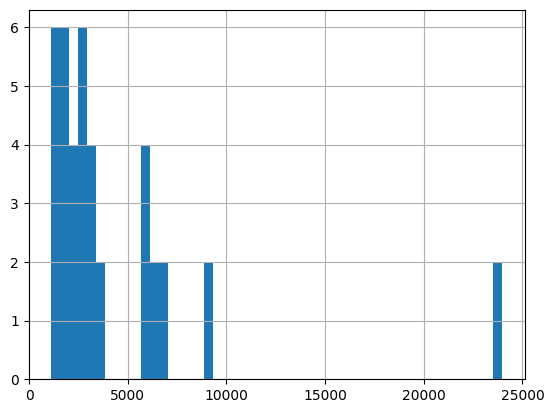

In [19]:
data = pd.read_csv(new_filepath)
#data = data[data['Variance'] <0000]
data['Variance'].hist(bins=50)
print(np.max(data['Variance']))

In [21]:
np.max(data['Variance'])

23967.760409183047

In [22]:
# Calculate the interquartile range (IQR)
q1 = np.percentile(df['R-R Interval (Samples)'], 25)
q3 = np.percentile(df['R-R Interval (Samples)'], 75)
iqr_rr = q3 - q1

In [23]:
# Calculate the lower and upper bounds for outliers
lower_bound = q1 - 1.5 * iqr_rr
upper_bound = q3 + 1.5 * iqr_rr

In [24]:
# Remove outliers from the data
df_clean = df[(df['R-R Interval (Samples)'] >= lower_bound) & (df['R-R Interval (Samples)'] <= upper_bound)]

In [25]:
# Print the number of outliers removed
num_outliers = len(df) - len(df_clean)
print(f"Number of outliers removed: {num_outliers}")

Number of outliers removed: 4


In [26]:
print(df_clean)
data_clean = df_clean['R-R Interval (Samples)']

     R-R Interval (Samples)
0                     749.2
1                     882.6
2                     787.0
3                     846.4
4                     793.8
..                      ...
332                   846.8
333                   819.8
334                   808.0
335                   823.6
336                   884.8

[333 rows x 1 columns]


In [27]:
# Calculate the range
range_rr = np.max(data_clean) - np.min(data_clean)

In [28]:
# Calculate the variance
var_rr = np.var(data_clean)

In [29]:
# Calculate the standard deviation
std_rr = np.std(data_clean)

In [30]:
# Calculate the coefficient of variation
cv_rr = std_rr / np.mean(data_clean) * 100

In [31]:
# Print the results
print(f"Range: {range_rr:.2f}")
print(f"IQR: {iqr_rr:.2f}")
print(f"Variance: {var_rr:.2f}")
print(f"Standard deviation: {std_rr:.2f}")
print(f"Coefficient of variation: {cv_rr:.2f}%")

Range: 252.80
IQR: 70.40
Variance: 2381.70
Standard deviation: 48.80
Coefficient of variation: 5.64%
